dataset source: https://www.kaggle.com/datasets/gpiosenka/100-bird-species

In [1]:
import tensorflow as tf
import tensorflow.keras.utils
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

from  matplotlib import pyplot as plt

%matplotlib inline


In [2]:
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
print('tensorflow: %s' % tensorflow.__version__)

tensorflow: 2.9.0-dev20220316


In [4]:
train_path = r'F:\archive2\train_80'
test_path = r'F:\archive2\test_80'
valid_path = r'F:\archive2\valid_80'

IMG_SHAPE = (244, 244)
BATCH_SIZE = 16

Found 400 images belonging to 80 classes.


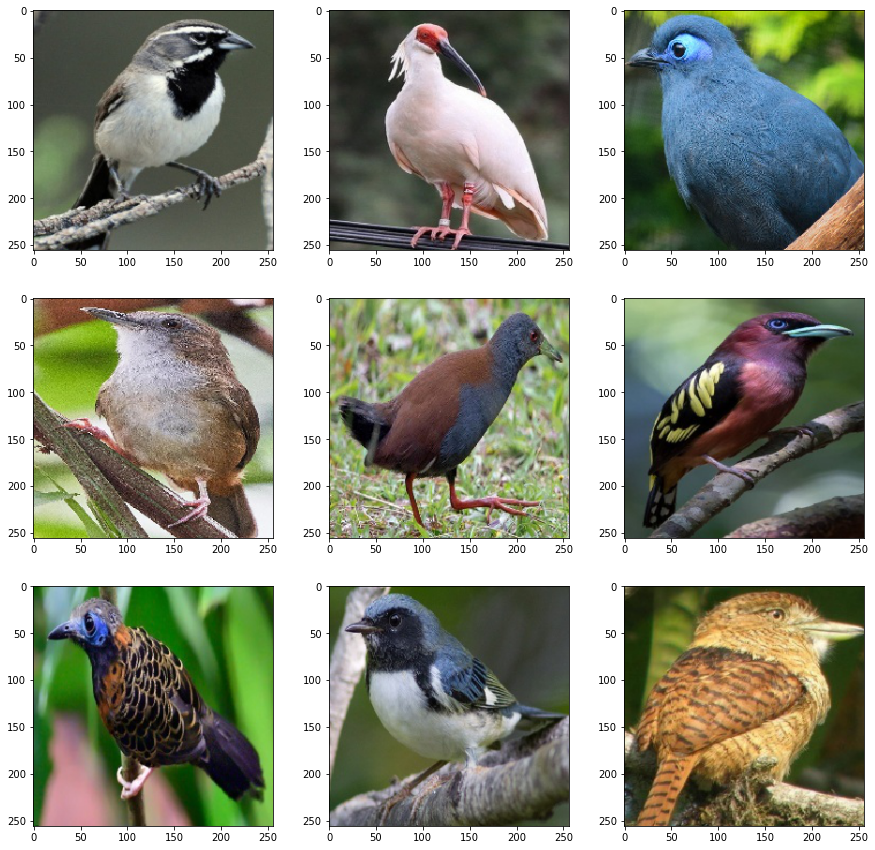

In [5]:
sample_generator = ImageDataGenerator().flow_from_directory(test_path, shuffle = True)

plt.figure(figsize = (15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = sample_generator.next()[0]
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 11642 files belonging to 80 classes.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 400 files belonging to 80 classes.


In [8]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  valid_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 400 files belonging to 80 classes.


In [9]:
class_names = train_ds.class_names

In [10]:
train_ds = train_ds.cache()
test_ds = test_ds.cache()
valid_ds = valid_ds.cache()

In [11]:
num_classes = len(class_names)

In [12]:
tf.keras.backend.clear_session()

In [13]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2,fill_mode = 'nearest')
])

In [14]:
base_model = tf.keras.applications.EfficientNetB7(include_top=False)

In [15]:
inputs = tf.keras.Input(shape = (244,244,3))
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'Global_Average_Pool_2D')(x)

outputs = layers.Dense(num_classes, activation = 'softmax')(x)

In [16]:
model = keras.Model(inputs, outputs, name = "model")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 Global_Average_Pool_2D (Glo  (None, 2560)             0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 80)                204880    
                                                                 
Total params: 64,302,567
Trainable params: 63,991,840
Non-trainable params: 310,727
___________________________________________

In [18]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [19]:
history = model.fit( 
    train_ds, 
    steps_per_epoch = len(train_ds), 
    epochs = 10,
    validation_data = valid_ds,
    validation_steps = len(valid_ds),
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7,
                                 patience = 2, verbose = 1)])

Epoch 1/10



KeyboardInterrupt



In [ ]:
model.save('saved_model/my_model1.h5')

In [28]:
model.save('saved_model/my_model2')